## OVO

A类均值: [-4, -4] , A类协方差矩阵: [[1, 0], [1, 1]]
B类均值: [0, 4] , B类协方差矩阵: [[0, 1], [1, 0]]
C类均值: [3, -3] , C类协方差矩阵: [[1, 0], [0, 1]]
最终权值: [[ 0.1        -3.66670474 -6.82343566]
 [ 0.1        -6.96628299  0.17774995]
 [ 0.1        -2.12149115  6.57631393]]
正确率: 1.0
紫线分割橙绿，蓝线分割蓝绿，红线分割橙蓝


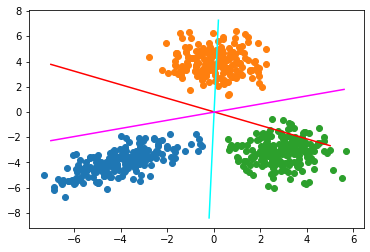

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

def PLA(X1,X2):
    #规定传进来的X1对应标签1，X2对应标签2
    np.random.seed(0)
    #w_init=np.random.randn(3)
    w_init=np.array([0.1,0.1,0.1])
    w = w_init
    y1 = np.linspace(1,1,200)
    y1 = y1.reshape([200,1])
    y2 = np.linspace(-1,-1,200)
    y2 = y2.reshape([200,1])
    X = np.concatenate((X1, X2), axis=0)
    y = np.concatenate((y1, y2), axis=0)
    k = X.shape[0]
    x1 = np.ones([k,1])
    X = np.concatenate((x1, X), axis=1)
    X, y = shuffle(X, y)
    ###################################
    mark = 0
    sum1 = 0
    init = 0
    while not mark:
        for i in range(k):
            f = np.dot(w, X[i])
            m = f*float(y[i])
            init += 1
            if m<=0:
                w = w + X[i]*float(y[i])
                sum1+=1
                break;
        if init == k:
            mark = 1
        if sum1 > 10000:
            mark = 1
        init = 0
    return w

###############################################
def OVO(X1,X2,X3):
    w1=PLA(X1,X2)
    w1=w1.reshape(1,3)
    w2=PLA(X1,X3)
    w2=w2.reshape(1,3)
    w3=PLA(X2,X3)
    w3=w3.reshape(1,3)
    w = np.concatenate((w1,w2), axis=0)
    w = np.concatenate((w,w3),axis=0)
    return w
############################################
num, dim=200,2
np.random.seed(0)
x2=np.random.randn(num, dim)
C=[[1,0],[1,1]]
W = [-4,-4]
print("A类均值:",W,", A类协方差矩阵:",C)
X1=np.dot(x2,C)+W
plt.scatter(X1[:,0],X1[:,1])
num, dim=200,2
np.random.seed(0)
x2_=np.random.randn(num, dim)
C=[[0,1],[1,0]]
W = [0,4]
print("B类均值:",W,", B类协方差矩阵:",C)
X2= np.dot(x2_,C)+W
plt.scatter(X2[:,0],X2[:,1])
x2=np.random.randn(num, dim)
C=[[1,0],[0,1]]
W = [3,-3]
print("C类均值:",W,", C类协方差矩阵:",C)
X3=np.dot(x2,C)+W
plt.scatter(X3[:,0],X3[:,1])
##################################################
w=OVO(X1,X2,X3)
##################################################
print("最终权值:",w)
####################################################
sum2=0
x1 = np.ones([200,1])
X1 = np.concatenate((x1, X1), axis=1)
X2 = np.concatenate((x1, X2), axis=1)
X3 = np.concatenate((x1, X3), axis=1)
for i in range(200):
    sign1=0
    sign2=0
    sign3=0
    m11= np.dot(w[0], X1[i])
    m21= np.dot(w[0], X2[i])
    if m11>0 :
        sign1+=1
    if m21<0:
        sign2+=1
    m12= np.dot(w[1], X1[i])
    m13= np.dot(w[1], X3[i])
    if m12>0:
        sign1+=1
    if m13<0:
        sign3+=1
    m23= np.dot(w[2], X2[i])
    m33= np.dot(w[2], X3[i])
    if m23>0:
        sign2+=1
    if m33<0:
        sign3+=1
    if sign1<2:
        sum2+=1
    if sign2<2:
        sum2+=1
    if sign3<2:
        sum2+=1
print("正确率:",(600-sum2)/600)
####################################################
print("紫线分割橙绿，蓝线分割蓝绿，红线分割橙蓝")
xx = np.linspace(-7,5)
zz = -w[0][1]/w[0][2]*xx - w[0][0]/w[0][2]
col = ["ff0000","00ffff","ff00ff"]
plt.plot(xx, zz,color=('#'+col[0]))
xx = np.linspace(-0.2,0.2)
zz = -w[1][1]/w[1][2]*xx - w[1][0]/w[1][2]
plt.plot(xx, zz,color=('#'+col[1]))
xx = np.linspace(-7,5.6)
zz = -w[2][1]/w[2][2]*xx - w[2][0]/w[2][2]
plt.plot(xx, zz,color=('#'+col[2]))
